## Machine Learning Algorithms

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df=pd.read_csv("automobile.csv")
df.rename(columns = {'normalized-losses':'normalised_losses', 'num-of-doors':'number_of_doors',
                    'wheel-base': 'wheel_base', 'engine-size':'engine_size', 'body_style':'body_style',
                    'drive-wheels':'drive_wheels', 'num-of-cylinders': 'num_of_cylinders', 
                    'fuel-system':'fuel_system', 'compression-ratio':'compression_ratio', 'peak-rpm':'peak_rpm',
                    'city-mpg':'city_mpg', 'highway-mpg': 'highway_mpg', 'curb-weight':'curb_weight'}, 
          inplace = True)

In [3]:
df.fillna(df.median(), inplace = True)
df['number_of_doors'].fillna(df['number_of_doors'].mode().iloc[0], inplace = True)

In [4]:
idx = 0
new_col = df['length'] * df['width'] * df['height']
df.insert(loc=idx, column='volume', value=new_col)

In [5]:
df.head()

,volume,symboling,normalised_losses,make,fuel-type,aspiration,number_of_doors,body-style,drive_wheels,engine-location,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,528019.904,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,528019.904,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,587592.640,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,634816.956,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,636734.832,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [275]:
change = preprocessing.LabelEncoder()
for name in df.columns:
    if df[name].dtypes == 'O':
        df[name] = df[name].astype(str)
        change.fit(df[name])
        df[name] = change.transform(df[name])

In [276]:
numeric_cols = df.select_dtypes(include = [np.number])
corr = numeric_cols.corr()
print ('Top ten Correlated Features with Price:'), print (corr['make'].sort_values(ascending = False)[:10], '\n')

Top ten Correlated Features with Price:
make                 1.000000
bore                 0.237813
height               0.230754
fuel_system          0.144769
compression_ratio    0.132554
length               0.110468
body-style           0.090621
wheel_base           0.073930
aspiration           0.071254
city_mpg             0.065761
Name: make, dtype: float64 



(None, None)

In [277]:
df['make']

0       0
1       0
2       0
3       1
4       1
       ..
196    21
197    21
198    21
199    21
200    21
Name: make, Length: 201, dtype: int64

<AxesSubplot:title={'center':'Affect bore has on the make with considerations of price'}, xlabel='make', ylabel='bore'>

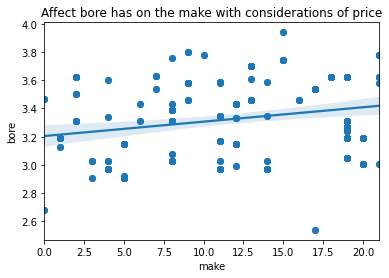

In [267]:
x = df['make']
y = df['bore']

plt.scatter(x, y)
plt.ylabel('bore')
plt.xlabel('make ')
plt.title('Affect bore has on the make with considerations of price')
sns.regplot(x,y)

<AxesSubplot:title={'center':'Affect height has on the make'}, xlabel='make', ylabel='height'>

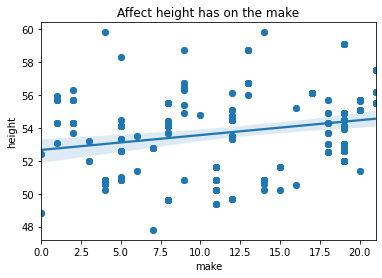

In [273]:
x = df['make']
y = df['height']

plt.scatter(x, y)
plt.ylabel('height')
plt.xlabel('make')
plt.title('Affect height has on the make')
sns.regplot(x,y)

<AxesSubplot:xlabel='make', ylabel='fuel_system'>

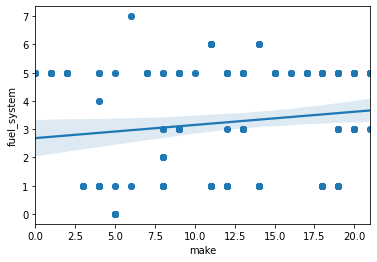

In [272]:
x = df['make']
y = df['fuel_system']

plt.ylabel('Fuel system')
plt.xlabel('Make ')
plt.scatter(x, y)
sns.regplot(x,y)
plt.title('Affect fuel system has on the make')

<AxesSubplot:xlabel='price', ylabel='Density'>

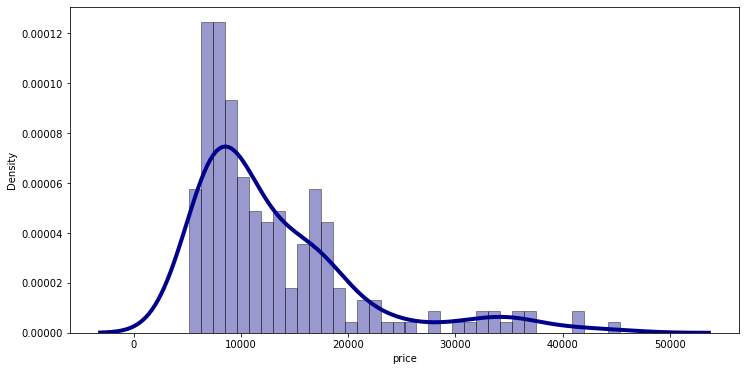

In [274]:
import warnings
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)
#
plt.figure(figsize=(12,6))
sns.distplot(df['price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

## Linear Regression

In [243]:
X1a = df.drop(['make'], axis = 1)
y1a = df['make']
X1a_train, X1a_test, y1a_train, y1a_test = train_test_split(X1a, y1a, test_size = 0.1, random_state = 42)

In [244]:
lr = linear_model.LinearRegression()
model = lr.fit(X1a_train, y1a_train)

In [245]:
y1a_pred = model.predict(X1a_test)
print(y1a_pred)

[11.64621054 -4.73966936  2.37658411  9.55696138 19.47801691 10.3636448
  1.65534319 17.45355199 10.43887033 -0.07984193  9.50910866 18.6135608
 17.90122426  7.61661672 10.59634373 15.27544765 12.33758029 11.68932073
  9.37582634  7.21792559 14.81421788]


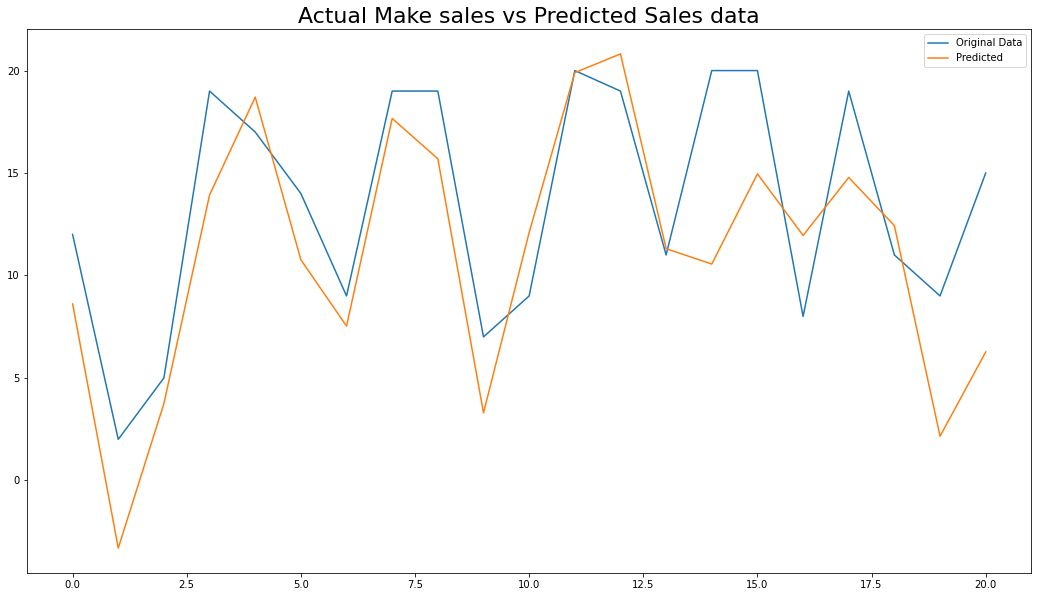

In [278]:
plt.figure(figsize=(18,10))

x = range(len(y1a_test))
plt.plot(x, y1a_test, label="Original Data")
plt.plot(x,y1a_pred, label="Predicted")

plt.title("Actual Make sales vs Predicted Sales data", size=22)
plt.legend()
plt.show()

### LR Scores

In [279]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [280]:
r2score_lrw = r2_score(y1a_test,y1a_pred)
s = model.score(X1a_test, y1a_test)
y1a_pred = model.predict(X1a_test)

In [281]:
print('R2 score is ',r2score_lrw)
print('Mean Absolute Error:', metrics.mean_absolute_error(y1a_test, y1a_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y1a_test, y1a_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1a_test, y1a_pred)))

R2 score is  0.38762780651993356
Mean Absolute Error: 3.560065566218204
Mean Squared Error: 18.81551750942154
Root Mean Squared Error: 4.337685731979847


#### Without outliers

In [282]:
df2 = pd.read_csv("automobile.csv")

In [240]:
change = preprocessing.LabelEncoder()
for name in df2.columns:
    if df2[name].dtypes == 'O':
        df2[name] = df2[name].astype(str)
        change.fit(df2[name])
        df2[name] = change.transform(df2[name])

In [241]:
numeric_cols = df2.select_dtypes(include = [np.number])
corr = numeric_cols.corr()
print('Top ten Uncorrelated Features with Price:'), print (corr['price'].sort_values(ascending = False)[-10:])

Top ten Uncorrelated Features with Price:
compression-ratio    0.071107
num-of-cylinders     0.005509
num-of-doors        -0.047087
body-style          -0.072933
symboling           -0.082391
peak-rpm            -0.101649
fuel-type           -0.110326
make                -0.163646
city-mpg            -0.686571
highway-mpg         -0.704692
Name: price, dtype: float64


(None, None)

In [242]:
df2 = df2.dropna()

In [252]:
X1b = df2.drop(['make'], axis = 1)
y1b = df2['make']
X1b_train, X1b_test, y1b_train, y1b_test = train_test_split(X1b, y1b, test_size = 0.1, random_state = 42)

In [253]:
lr2 = linear_model.LinearRegression()
model = lr2.fit(X1b_train, y1b_train)
y1b_pred = model.predict(X1b_test)

In [254]:
r2score_lrwo = r2_score(y1b_test,y1b_pred)

In [299]:
print('R2 score is ', r2score_lrwo)

R2 score is  0.5441473853415693


### Support Vector Machine 

In [113]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [232]:
X2 = df.drop(['make'], axis = 1)
y2 = df['make']

In [233]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.10, random_state = 42)

In [234]:
sc = StandardScaler()
sc.fit(X2_train)
X2_train_ = sc.transform(X2_train)
X2_test_ = sc.transform(X2_test)

In [235]:
svc = SVC()
svc.fit(X2_train, y2_train)
y2_pred = svc.predict(X2_test)
acc_svc = round(svc.score(X2_train, y2_train) * 100, 2)

In [236]:
r2score_svc = r2_score(y2_test,y2_pred)

In [261]:
print('R2 score is ',r2score_svc)
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))
#print('Accuracy score: ', acc_svc)

R2 score is  -0.08487084870848727
Mean Absolute Error: 4.095238095238095
Mean Squared Error: 33.333333333333336
Root Mean Squared Error: 5.773502691896258


In [285]:
print('Model accuracy score {0:0.4f}'.format(accuracy_score(y2_test, y2_pred)))
print("Precision Score : ",precision_score(y2_test, y2_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y2_test, y2_pred, 
                                           pos_label='positive',
                                           average='micro'))

Model accuracy score 0.2857
Precision Score :  0.2857142857142857
Recall Score :  0.2857142857142857


### Random Forest

In [300]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [301]:
X3 = df.drop(['make'], axis = 1)
y3 = df['make']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.1, random_state = 42)

In [302]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(X3_train, y3_train)

y3_pred=clf.predict(X3_test)
#print(y_pred)
#print("Accuracy:",metrics.accuracy_score(y1_test, y_pred))

In [303]:
r3score_rf = r2_score(y3_test,y3_pred)

In [304]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X3_train, y3_train)
y3_pred = random_forest.predict(X3_test)
random_forest.score(X3_train, y3_train)
acc_random_forest = round(random_forest.score(X3_train, y3_train) * 100, 2)

In [305]:
#print(y_pred)
#print("Accuracy:",metrics.accuracy_score(y1_test, y_pred))
print('R2 score is ',r2score_rf)
print('Mean Absolute Error:', metrics.mean_absolute_error(y3_test, y3_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y3_test, y3_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)))

R2 score is  0.8983755925711073
Mean Absolute Error: 1.5238095238095237
Mean Squared Error: 22.38095238095238
Root Mean Squared Error: 4.7308511264837305


In [308]:
print('Model accuracy score {0:0.4f}'. format(accuracy_score(y3_test, y3_pred)))
print("Precision Score : ",metrics.precision_score(y3_test, y3_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",metrics.recall_score(y3_test, y3_pred, 
                                           pos_label='positive',
                                           average='micro'))

Model accuracy score 0.8571
Precision Score :  0.8571428571428571
Recall Score :  0.8571428571428571


In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'R squared Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree],
'Mean squared error ': })
models.sort_values(by='Score', ascending=False)

In [287]:
feature_scores = pd.Series(random_forest.feature_importances_, index=X3_train.columns).sort_values(ascending=False)

feature_scores

stroke               0.090517
peak_rpm             0.075034
normalised_losses    0.070901
bore                 0.065317
length               0.064068
width                0.060122
height               0.059336
wheel_base           0.057516
engine_size          0.056987
fuel_system          0.048092
curb_weight          0.042862
engine-type          0.042744
horsepower           0.037143
price                0.036221
symboling            0.035402
compression_ratio    0.032979
city_mpg             0.031893
highway_mpg          0.027372
drive_wheels         0.021886
num_of_cylinders     0.021308
body-style           0.010227
number_of_doors      0.005313
aspiration           0.004861
fuel-type            0.001271
engine-location      0.000629
dtype: float64

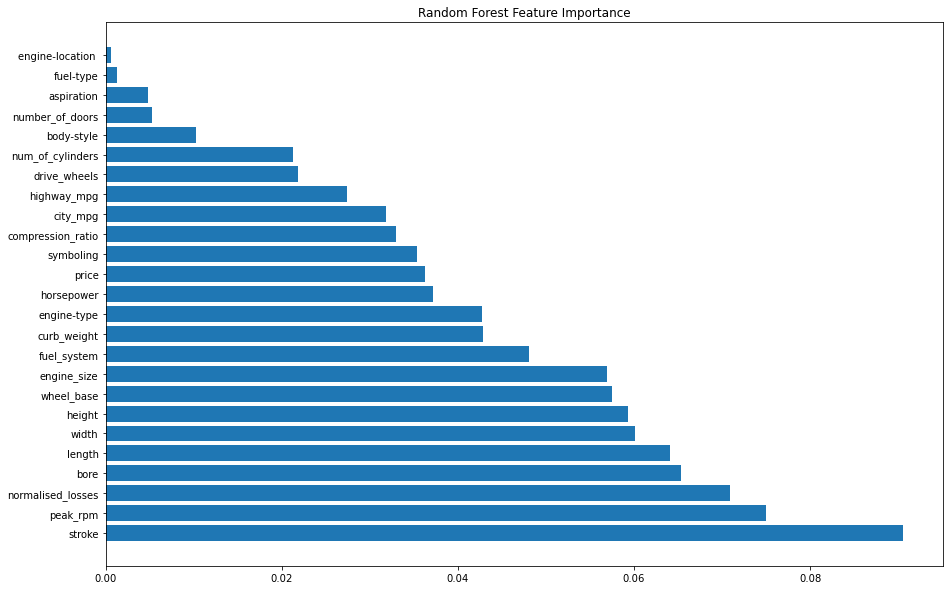

In [288]:
x =['stroke','peak_rpm','normalised_losses','bore','length',
    'width','height','wheel_base','engine_size','fuel_system',
    'curb_weight','engine-type','horsepower','price','symboling',
    'compression_ratio','city_mpg','highway_mpg','drive_wheels','num_of_cylinders',
    'body-style','number_of_doors','aspiration', 'fuel-type', 'engine-location ' ]
plt.figure(figsize=(15,10))
plt.barh(x, feature_scores)
plt.title('Random Forest Feature Importance')
plt.show()

### KNN

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [217]:
X4 = df.drop(['make'], axis = 1)
y4 = df['make']

In [218]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.10, random_state = 42)

In [225]:
knn = KNeighborsClassifier(n_neighbors=2)
scaler = StandardScaler()
scaler.fit(X4_train)

# fit the model
knn.fit(X4_train, y4_train)
X4_train = scaler.transform(X4_train)
X4_test = scaler.transform(X4_test)

y4_pred = knn.predict(X4_test)

In [226]:
error = []

for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X4_train, y4_train)
    pred_i = knn.predict(X4_test)
    error.append(np.mean(pred_i != y4_test))

In [227]:
r2score_knn = r2_score(y4_test,y4_pred)

In [228]:
print('R2 score is ',r2score_knn)
print('Mean Absolute Error:', metrics.mean_absolute_error(y4_test, y4_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y4_test, y4_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y4_test, y4_pred)))

R2 score is  0.24369003690036894
Mean Absolute Error: 2.380952380952381
Mean Squared Error: 23.238095238095237
Root Mean Squared Error: 4.820590756130958


In [284]:
print('Model accuracy score {0:0.4f}'. format(accuracy_score(y4_test, y4_pred)))
print("Precision Score : ",precision_score(y4_test, y4_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y4_test, y4_pred, 
                                           pos_label='positive',
                                           average='micro'))

Model accuracy score 0.6667
Precision Score :  0.6666666666666666
Recall Score :  0.6666666666666666


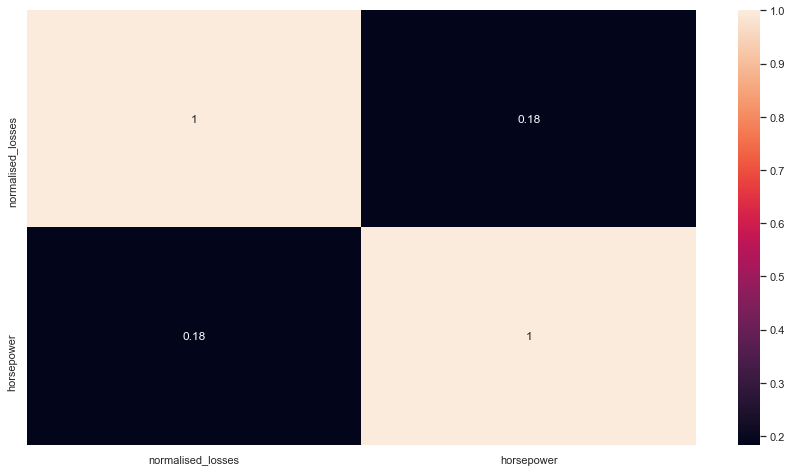

In [15]:
corr = df.corr()
plt.figure(figsize=(15,8))
a = sns.heatmap(corr, annot=True)